In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from commando import ComManDo

Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod2.h5ad')

In [3]:
X1 = data_mod1.X
X2 = data_mod2.X

# Run Mapping

In [14]:
commando_optimized = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=1000,
        two_step_aggregation = 'kmed',
        two_step_pd_large=2000,
        two_step_log_pd=5,
        two_step_num_partitions=10,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Two-Step group sizes:
1, 31, 33, 119, 1, 57, 18, 58, 1, 181
Shape of Raw data
Dataset 0: (500, 600)
Dataset 1: (500, 600)
Device: cuda:0
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating intra-group F #5
1x1 distance matrix, escaping...
Calculating intra-group F #10
epoch:[1000/2000] err:0.2110 alpha:0.9603
epoch:[2000/2000] err:0.1743 alpha:0.9775
Calculating inter-group F
epoch:[1000/2000] err:1.9125 alpha:0.1146
epoch:[2000/2000] err:2.4288 alpha:0.1119
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
Calculating intra-group F #5
1x1 distance matrix, escaping...
Calculating intra-group F #10
epoch:[1000/2000] err:0.9839 alpha:6.6579
epoch:[2000/2000] err:0.9869 alpha:6.7533
Calculating inter-group F
epoch:[1000/2000] err:2.8146 alpha:0.2168
epoch:[2000/2000] err:3.3167 alpha:0.2344
---------------------------------
Find correspondence between Dataset 2 and Dataset 2
Calculating 

In [15]:
commando_normal = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=1000,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 600)
Dataset 1: (500, 600)
Device: cuda:0
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
epoch:[1000/2000] err:0.2451 alpha:0.7782
epoch:[2000/2000] err:0.2526 alpha:0.9008
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[1000/2000] err:0.9675 alpha:4.7533
epoch:[2000/2000] err:0.9727 alpha:5.5065
---------------------------------
Find correspondence between Dataset 2 and Dataset 2
epoch:[1000/2000] err:0.7438 alpha:0.7918
epoch:[2000/2000] err:0.6264 alpha:0.9178
Finished Matching!
---------------------------------
Performing NLMA
Constructing Dense W
Applying Coefficients
Computing Laplacian
Calculating eigenvectors
Filtering eigenvectors
Perfoming mapping
---------------------------------
ComManDo Done!
Time: 4.275034189224243 seconds


# Evaluate

ComManDo Optimized Pairwise Error: 7.437071436317638
ComManDo Normal Pairwise Error:    4.410470958006044


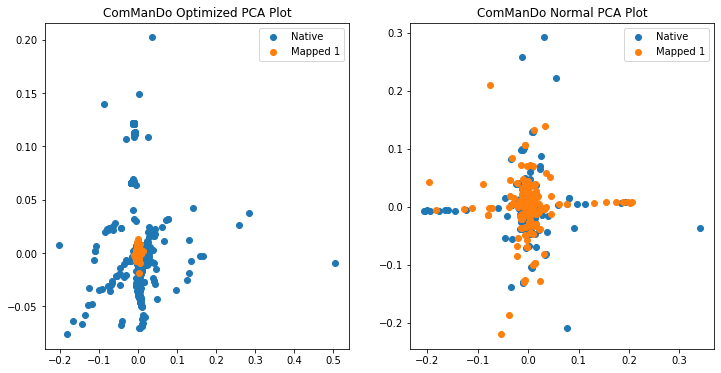

In [16]:
print('ComManDo Optimized Pairwise Error: ' + str(pairwise_error(*commando_optimized, normalize_by_feature=True)))
print('ComManDo Normal Pairwise Error:    ' + str(pairwise_error(*commando_normal, normalize_by_feature=True)))

plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
alignment_visualize(*commando_optimized, alg_name='ComManDo Optimized')

plt.subplot(1, 2, 2)
alignment_visualize(*commando_normal, alg_name='ComManDo Normal')